In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [75]:
data = pd.read_csv('Boston.csv')

In [76]:
X = data.drop('medv', axis=1)
Y = data['medv']

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [78]:
ridge = Ridge()

In [79]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCv = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [80]:
print(ridgeCv.best_params_)

{'alpha': 1}


In [81]:
print(ridgeCv.best_score_)

-26.223960793084483


In [82]:
ridge_pred=ridgeCv.predict(X_test)

In [83]:
ridge_pred

array([28.34715071, 36.21437831, 14.80303493, 25.22804634, 19.17458952,
       22.29031648, 17.33028278, 13.95318273, 22.14506024, 20.74582213,
       24.14011309, 18.40447565, -7.01750315, 21.1846762 , 19.19820978,
       26.02798498, 19.86973569,  5.51208138, 40.33260217, 17.84866562,
       27.65388459, 30.02887972, 10.98804148, 24.46625789, 18.37620309,
       15.25046005, 22.61319214, 14.80791284, 21.62917267, 19.57814764,
       21.73254632, 25.36726035, 25.30044412, 19.30763226, 15.88564352,
       18.87116841, 30.92984029, 20.76386724, 23.49286646, 24.67082407,
       14.0468997 , 31.67610639, 42.34382119, 17.35629744, 26.91818696,
       17.33727443, 13.86600737, 25.91730843, 19.76761959, 30.38603367,
       21.22823089, 33.9789751 , 15.71192385, 26.17445031, 39.58477186,
       22.87290593, 19.40274082, 33.07593414, 24.76614616, 12.67254167,
       23.02338367, 31.20498451, 31.79965924, 16.82657749, 21.53203533,
       15.72325795, 20.43639171, 26.13467468, 31.26561709, 12.25

C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='medv', ylabel='Count'>

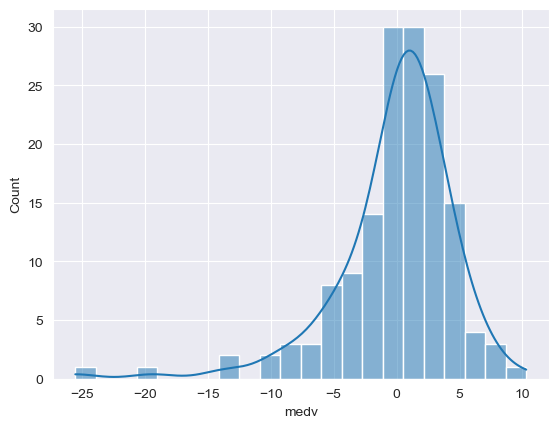

In [84]:
import seaborn as sns
sns.histplot(ridge_pred-Y_test,kde=True)

In [85]:
score=r2_score(Y_test, ridge_pred)

In [86]:
score


0.7041586727559437

# lasso Regression

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso=Lasso()

In [89]:
parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCv = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error',cv=5)
lassoCv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [90]:
print(lassoCv.best_params_)

{'alpha': 1}


In [91]:
print(lassoCv.best_score_)

-30.738796705831373


In [92]:
lasso_pred = lassoCv.predict(X_test)

In [93]:
lasso_pred

array([28.32594039, 32.50501665, 14.7038865 , 25.96597434, 19.01847442,
       22.20173071, 17.98724908, 12.09858239, 22.10763459, 21.20206643,
       21.11060718, 20.27428557, -5.05290749, 21.1645863 , 21.83356679,
       23.8186495 , 20.0276891 ,  6.38295432, 36.99791241, 18.08714278,
       27.74621555, 29.24694172, 12.1170163 , 24.31643541, 19.33128652,
       16.60369029, 23.45441289, 13.88954404, 19.20732406, 20.73173499,
       22.93002779, 26.22722688, 22.81857564, 23.63881683, 14.88657326,
       21.63036934, 30.5995588 , 23.18289794, 20.64991967, 24.44449681,
       14.80576968, 30.55615514, 38.16173487, 19.36798969, 26.82363528,
       18.65566438, 15.68413424, 25.38990071, 19.3132915 , 31.38596273,
       23.57377579, 32.98854539, 16.21162548, 25.72128752, 37.1961088 ,
       22.96724407, 19.82840563, 32.44481568, 24.87903996, 15.49549366,
       24.03163661, 31.13904848, 31.16244463, 19.16687872, 25.1135632 ,
       13.98608651, 19.57557807, 26.84926784, 31.27520533, 13.05

C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


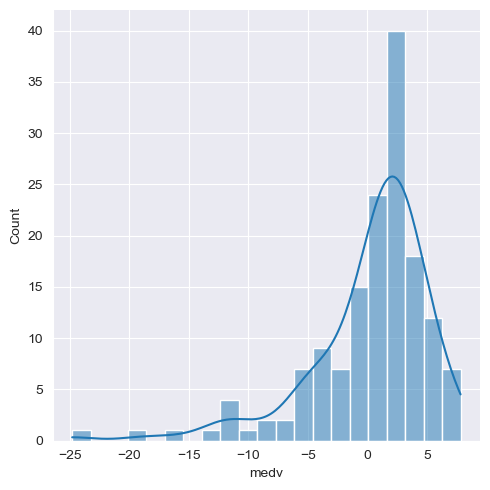

In [97]:
import seaborn as sns
sns.displot(lasso_pred-Y_test, kde=True)

In [95]:
score2=r2_score(Y_test, lasso_pred)

In [96]:
score2

0.655906082915434